<div style="font-size: 40px; text-align: center;"><b>Donor Choose Project Model Training

<b></div><br><br>

<div style="font-size: 20px; text-align: justify;"><br><br> Importing datasets train data and resources.<br><br>
</div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
X_train_resampled=pd.read_csv("/home/devipriya/Ammu/Scaler_project/DonorChooseFiles/Final_files/X_train_resampled.csv") 
y_train_resampled=pd.read_csv("/home/devipriya/Ammu/Scaler_project/DonorChooseFiles/Final_files/y_train_resampled.csv")
X_val=pd.read_csv("/home/devipriya/Ammu/Scaler_project/DonorChooseFiles/Final_files/X_val.csv")
y_val=pd.read_csv("/home/devipriya/Ammu/Scaler_project/DonorChooseFiles/Final_files/y_val.csv")
X_test=pd.read_csv("/home/devipriya/Ammu/Scaler_project/DonorChooseFiles/Final_files/X_test.csv")
y_test=pd.read_csv("/home/devipriya/Ammu/Scaler_project/DonorChooseFiles/Final_files/y_test.csv")
X_train_resampled.head()



,teacher_number_of_previously_posted_projects,len_project_essay3,len_project_essay4,year_of_submission,month_of_submission,day_of_submission,day_of_week,week_of_submission,hour_of_submission,quarter_of_submission,...,Music,Nutrition Education,Other,Parent Involvement,Performing Arts,Social Sciences,Special Needs.1,Team Sports,Visual Arts,Warmth.1
0,0.570523,-0.174154,-0.181281,-0.619271,0.043094,-0.910802,0.177890,-0.058319,-0.079760,0.369207,...,0,0,0,0,0,0,0,0,0,0
1,-0.329502,-0.174154,-0.181281,1.614803,-1.775410,-0.146074,1.246760,-1.811591,-0.947588,-1.511165,...,0,0,0,0,0,0,1,0,0,0
2,-0.257500,-0.174154,-0.181281,-0.619271,0.346178,-0.473815,0.177890,0.292335,-0.600456,0.369207,...,0,0,0,0,0,0,0,0,0,0
3,-0.221499,-0.174154,-0.181281,-0.619271,1.558514,0.509406,-0.890979,1.624821,0.961634,1.309393,...,0,0,1,0,0,0,0,0,0,0
4,-0.329502,-0.174154,-0.181281,-0.619271,0.649262,-1.566283,0.177890,0.502727,-1.294719,0.369207,...,0,0,0,0,0,0,0,0,0,0


In [3]:
y_train_resampled = y_train_resampled.values.ravel()
y_val = y_val.values.ravel()
y_test = y_test.values.ravel()


<div style="font-size: 20px; text-align: justify;"> <br><br><br><br>1. Baseline model.</div><br><br>



<div style="font-size: 20px; text-align: justify;"> <ul>Using Logistic Regression and Naive Bayes as baseline models to assess the performance.</div></ul><br><br>



In [4]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)


y_pred = log_reg.predict(X_val)
accuracy_lg = accuracy_score(y_val, y_pred)


print(f"Accuracy: {accuracy_lg:.4f}")


print("Final Model Evaluation:")
print(classification_report(y_val, y_pred))

Accuracy: 0.8303
Final Model Evaluation:
              precision    recall  f1-score   support

           0       0.35      0.17      0.23      3240
           1       0.87      0.95      0.90     18609

    accuracy                           0.83     21849
   macro avg       0.61      0.56      0.57     21849
weighted avg       0.79      0.83      0.80     21849



In [5]:
from sklearn.naive_bayes import GaussianNB


nb = GaussianNB()
nb.fit(X_train_resampled, y_train_resampled)


y_pred_nb = nb.predict(X_val)


nb_accuracy = accuracy_score(y_val, y_pred_nb)

print("\nNaive Bayes Performance:")
print(f"Accuracy: {nb_accuracy:.4f}")
print(classification_report(y_val, y_pred_nb))



Naive Bayes Performance:
Accuracy: 0.6586
              precision    recall  f1-score   support

           0       0.19      0.41      0.26      3240
           1       0.87      0.70      0.78     18609

    accuracy                           0.66     21849
   macro avg       0.53      0.56      0.52     21849
weighted avg       0.77      0.66      0.70     21849



<div style="font-size: 20px; text-align: justify;"> <ul>Logistic Regression displays better accuracy precision and recall for positive classes than naive bayes, but the model struggles with identifying non- approved projects.</div></ul><br><br>



<div style="font-size: 20px; text-align: justify;">2.  Classification Models.</div><br><br>



<div style="font-size: 20px; text-align: justify;"><ul>a. Decision Tree</ul></div><br>



In [6]:
from sklearn.tree import DecisionTreeClassifier


dtree = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=5, min_samples_leaf=2)
dtree.fit(X_train_resampled, y_train_resampled)

y_val_pred = dtree.predict(X_val)

y_val_proba = dtree.predict_proba(X_val)[:, 1]


In [7]:

dt_accuracy = accuracy_score(y_val, y_val_pred)
dt_auc = roc_auc_score(y_val, y_val_proba)



print(f"Accuracy: {dt_accuracy:.4f}")
print(f"AUC Score: {dt_auc:.4f}")
print(classification_report(y_val, y_val_pred))


Accuracy: 0.8001
AUC Score: 0.6695
              precision    recall  f1-score   support

           0       0.28      0.23      0.25      3240
           1       0.87      0.90      0.88     18609

    accuracy                           0.80     21849
   macro avg       0.58      0.56      0.57     21849
weighted avg       0.78      0.80      0.79     21849



<div style="font-size: 20px; text-align: justify;"><br><br><br>b. Random Forest<br><br>
<ul>Finding the best estimator using random search.</ul></div><br>



In [8]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV


# param_distributions = {
#     'n_estimators': [50, 100, 200],       
#     'max_depth': [10, 20, None],          
#     'min_samples_split': [2, 5, 10],      
#     'min_samples_leaf': [1, 2, 4],        
#     'bootstrap': [True, False]           
# }

# rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)


# random_search = RandomizedSearchCV(
#     estimator=rf_model,
#     param_distributions=param_distributions,
#     n_iter=3,               
#     scoring='roc_auc',      
#     cv=3,                    
#     verbose=2,
#     random_state=42,
#     n_jobs=1               
# )

# random_search.fit(X_train_resampled, y_train_resampled)

# print("\nBest Parameters Found:")
# random_search.best_params_


<div style="font-size: 20px; text-align: justify;"><br><br>
<ul>Using ML flow to log the parameters and analyse results.</ul></div><br>



In [9]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


mlflow.set_experiment("DonorsChoose_RF_Classifier")

with mlflow.start_run(run_name="RandomForest_with_ResampledData"):


    best_rf_model = RandomForestClassifier(
        n_estimators=300,
        max_depth=10,
        min_samples_split=10,
        min_samples_leaf=5,
        bootstrap=True,
        class_weight={0: 5, 1: 1},
        random_state=42,
        n_jobs=1
    )


    best_rf_model.fit(X_train_resampled, y_train_resampled)


    y_pred = best_rf_model.predict(X_val)
    y_proba = best_rf_model.predict_proba(X_val)[:, 1]


    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_proba)

    print( f'Accuracy Score : {accuracy}\n\n Precision : {precision}\n\nRecall : {recall}\n\nF1 Score : {f1}\n\nRoc_auc score : {roc_auc}')



 
    mlflow.log_params({
        "n_estimators": 300,
        "max_depth": 10,
        "min_samples_split": 10,
        "min_samples_leaf": 5,
        "bootstrap": True,
        "class_weight": "{0: 5, 1: 1}",
        "random_state": 42,
        "n_jobs": 1
    })

 
    mlflow.log_metrics({
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "roc_auc": roc_auc
    })
    input_example = X_val.iloc[:5] if isinstance(X_val, pd.DataFrame) else None

 
    mlflow.sklearn.log_model(best_rf_model, "random_forest_model",input_example=input_example,
    signature=mlflow.models.infer_signature(X_val, y_pred))
   


Accuracy Score : 0.175431369856744

 Precision : 0.9654631083202512

Recall : 0.033048524907302916

F1 Score : 0.0639093837680557

Roc_auc score : 0.6718271193614664


/home/devipriya/.local/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


<div style="font-size: 20px; text-align: justify;"><br><br>
<ul>Using graphical method to find the best threshold as the recall value is very low.</ul></div><br>



/home/devipriya/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/devipriya/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/devipriya/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/devipriya/.local/lib/python3.12

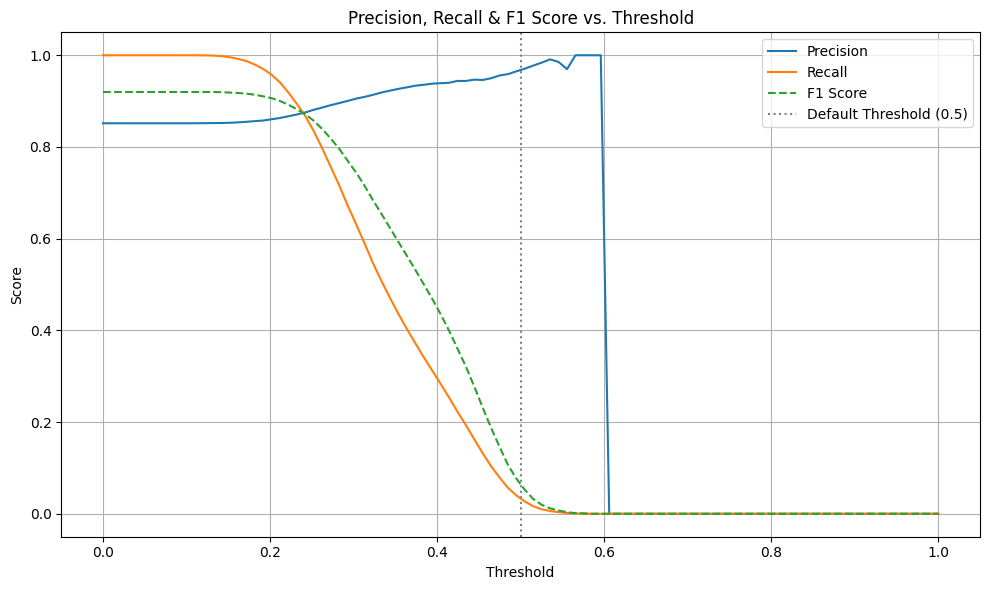

In [10]:
y_proba = best_rf_model.predict_proba(X_val)[:, 1]


thresholds = np.linspace(0, 1, 100)
precisions = []
recalls = []
f1s = []


for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    precisions.append(precision_score(y_val, y_pred_thresh))
    recalls.append(recall_score(y_val, y_pred_thresh))
    f1s.append(f1_score(y_val, y_pred_thresh))


plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f1s, label='F1 Score', linestyle='--')
plt.axvline(0.5, color='gray', linestyle=':', label='Default Threshold (0.5)')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall & F1 Score vs. Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<div style="font-size: 20px; text-align: justify;"><br><br>
<ul>Logging model with threshold 0.25.</ul></div><br>



In [11]:

import mlflow.models


mlflow.set_experiment("DonorsChoose_RF_Classifier")

with mlflow.start_run(run_name="RandomForest_with_Threshold_0.25"):

   
    best_rf_model = RandomForestClassifier(
        n_estimators=300,
        max_depth=10,
        min_samples_split=10,
        min_samples_leaf=5,
        bootstrap=True,
        class_weight={0: 5, 1: 1},
        random_state=42,
        n_jobs=1
    )


    best_rf_model.fit(X_train_resampled, y_train_resampled)


    y_proba = best_rf_model.predict_proba(X_val)[:, 1]
    threshold = 0.25
    y_pred_thresh = (y_proba >= threshold).astype(int)


    accuracy = accuracy_score(y_val, y_pred_thresh)
    precision = precision_score(y_val, y_pred_thresh)
    recall = recall_score(y_val, y_pred_thresh)
    f1 = f1_score(y_val, y_pred_thresh)
    roc_auc = roc_auc_score(y_val, y_proba)
    print( f'Accuracy Score : {accuracy}\n\n Precision : {precision}\n\nRecall : {recall}\n\nF1 Score : {f1}\n\nRoc_auc score : {roc_auc}')



    mlflow.log_params({
        "n_estimators": 300,
        "max_depth": 10,
        "min_samples_split": 10,
        "min_samples_leaf": 5,
        "bootstrap": True,
        "class_weight": "{0: 5, 1: 1}",
        "random_state": 42,
        "n_jobs": 1,
        "threshold": threshold
    })


    mlflow.log_metrics({
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "roc_auc": roc_auc
    })
    print( f'Accuracy Score : {accuracy}\n\n Precision : {precision}\n\nRecall : {recall}\n\nF1 Score : {f1}\n\nRoc_auc score : {roc_auc}')



    input_example = X_val.iloc[:5] if isinstance(X_val, pd.DataFrame) else None
    signature = mlflow.models.infer_signature(X_val, y_pred_thresh)

    mlflow.sklearn.log_model(
        sk_model=best_rf_model,
        artifact_path="random_forest_model",
        input_example=input_example,
        signature=signature
    )

  


Accuracy Score : 0.7677696919767495

 Precision : 0.8797059978679235

Recall : 0.8425493041001666

F1 Score : 0.8607268335529205

Roc_auc score : 0.6718271193614664
Accuracy Score : 0.7677696919767495

 Precision : 0.8797059978679235

Recall : 0.8425493041001666

F1 Score : 0.8607268335529205

Roc_auc score : 0.6718271193614664


/home/devipriya/.local/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


<div style="font-size: 20px; text-align: justify;"><br><br><br>c. XG Boost<br><br>
<ul>Finding the best estimator using random search.</ul></div><br>



In [12]:
# from sklearn.model_selection import RandomizedSearchCV
# from xgboost import XGBClassifier
# from sklearn.metrics import make_scorer, f1_score

# param_dist = {
#     'n_estimators': [100, 200, 300,400],
#     'max_depth': [4, 6, 8],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'subsample': [0.8, 0.9,1.0],
#     'colsample_bytree': [0.8, 1.0],
#     'min_child_weight': [1, 3, 5],
#     'scale_pos_weight': [1, 3, 5]
# }

# model = XGBClassifier(
#     objective='binary:logistic',
#     use_label_encoder=False,
#     eval_metric='logloss',
#     n_jobs=1,
#     random_state=42
# )

# scorer = make_scorer(f1_score)

# random_search = RandomizedSearchCV(
#     estimator=model,
#     param_distributions=param_dist,
#     scoring=scorer,
#     cv=3,
#     verbose=2,
#     n_jobs=1,
#     n_iter=20,  
#     random_state=42
# )

# random_search.fit(X_train_resampled, y_train_resampled)

# print("Best Parameters:", random_search.best_params_)
# print("Best F1 Score:", random_search.best_score_)


<div style="font-size: 20px; text-align: justify;"><br><br>
<ul>Using ML flow to log the parameters and analyse results.</ul></div><br>



In [13]:
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, f1_score

best_xgb_params = {
    'n_estimators': 400,
    'max_depth': 10,
    'learning_rate': 0.2,
    'subsample': 1,
    'colsample_bytree': 1,
    'min_child_weight': 3,
    'scale_pos_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'use_label_encoder': False,
    'random_state': 42,
    'n_jobs': -1
}


mlflow.set_experiment("DonorsChoose_XGBoost")

with mlflow.start_run(run_name="XGB"):

   
    model = XGBClassifier(**best_xgb_params)
    model.fit(X_train_resampled, y_train_resampled)

   
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1]

 
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_proba)

    print(f'Accuracy : {accuracy}\n\nPrecision : {precision}\n\nRecall : {recall}\n\nF1_Score : {f1}\n\nRoc_Auc : {roc_auc}')

  
    mlflow.log_params(best_xgb_params)

   
    mlflow.log_metrics({
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "roc_auc": roc_auc
    })

  
    input_example = X_val.iloc[:5] if hasattr(X_val, "iloc") else None
    signature = mlflow.models.infer_signature(X_val, y_pred)

    mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="xgboost_model",
        input_example=input_example,
        signature=signature
    )

  


/home/devipriya/.local/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:34:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy : 0.8494210261339191

Precision : 0.8659404710716163

Recall : 0.973991079585147

F1_Score : 0.9167931208902378

Roc_Auc : 0.7197661724812566


/home/devipriya/.local/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


<div style="font-size: 20px; text-align: justify;"><br><br><br>d. LightGBM classifier<br><br>
</div><br>



In [14]:

from lightgbm import LGBMClassifier
import mlflow.models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


import mlflow
import mlflow.sklearn



lgbm_model = LGBMClassifier(
    n_estimators=300,
    max_depth=8,
    learning_rate=0.1,
    num_leaves=20,
    class_weight={0: 1, 1: 1},  
    random_state=42,
    n_jobs=-1
)


mlflow.end_run()


mlflow.set_experiment("DonorsChoose_LightGBM")

with mlflow.start_run(run_name="LGBM"):

   
    lgbm_model.fit(X_train_resampled, y_train_resampled)

   
    y_pred = lgbm_model.predict(X_val)
    y_proba = lgbm_model.predict_proba(X_val)[:, 1]


    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_proba)
    print(f'Accuracy : {accuracy}\n\nPrecision : {precision}\n\nRecall : {recall}\n\nF1_Score : {f1}\n\nRoc_Auc : {roc_auc}')


  
    mlflow.log_params({
        "n_estimators": 400,
        "max_depth": 10,
        "learning_rate": 0.1,
        "num_leaves": 31,
        "class_weight": "{0: 1, 1: 1}",
        "random_state": 42
    })


    mlflow.log_metrics({
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "roc_auc": roc_auc
    })

  
    input_example = X_val.iloc[:5] if hasattr(X_val, "iloc") else None
    signature = mlflow.models.infer_signature(X_val, y_pred)

    mlflow.sklearn.log_model(
        sk_model=lgbm_model,
        artifact_path="lightgbm_model",
        input_example=input_example,
        signature=signature
    )



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55485, number of negative: 55485
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.365845 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 131284
[LightGBM] [Info] Number of data points in the train set: 110970, number of used features: 610
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy : 0.8528994461989107

Precision : 0.8642062928791104

Recall : 0.9815143210274598

F1_Score : 0.9191324476650563

Roc_Auc : 0.739092394560179


/home/devipriya/.local/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


<div style="font-size: 20px; text-align: justify;"><br><br><br><ul>As LightGBM model gave the best result on F1 score and other metrics on validation data, applying the model to test data.</ul><br><br>
</div><br>



In [15]:
y_pred_test = lgbm_model.predict(X_test)
y_proba_test = lgbm_model.predict_proba(X_test)[:, 1]


accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_proba_test)
print(f'\n\nAccuracy : {accuracy}\n\nPrecision : {precision}\n\nRecall : {recall}\n\nF1_Score : {f1}\n\nRoc_Auc : {roc_auc}')



Accuracy : 0.8482310403222115

Precision : 0.8620673327335575

Recall : 0.9783438121339137

F1_Score : 0.916532420459122

Roc_Auc : 0.7431837873483493
